In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier 
import warnings # ignore specific future warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
data= pd.read_excel('glass.xlsx', sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data.describe()   #describing data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
data.dtypes    #data types

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
data.shape

(214, 10)

# EDA

In [6]:
data.isnull().sum()   #null values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data.nunique()   # unique values

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [8]:
data['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

# Data Visualization

### Histogram

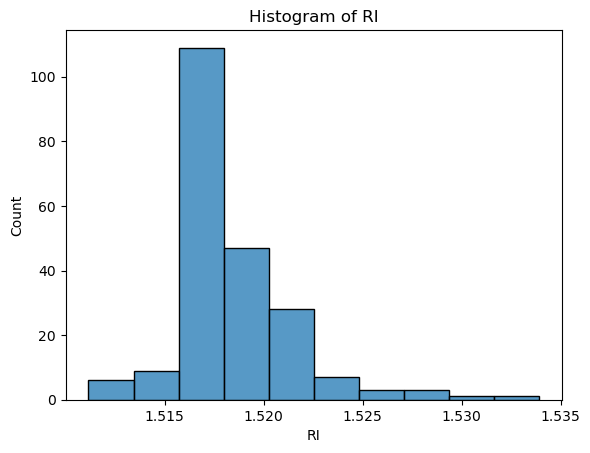

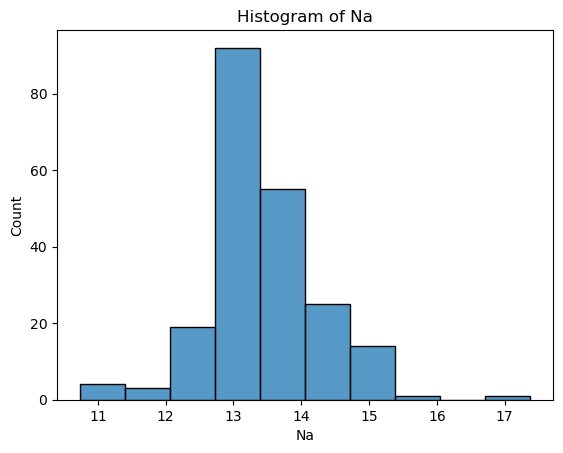

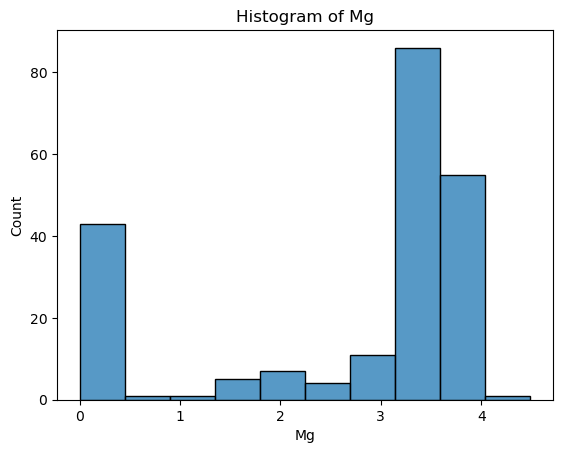

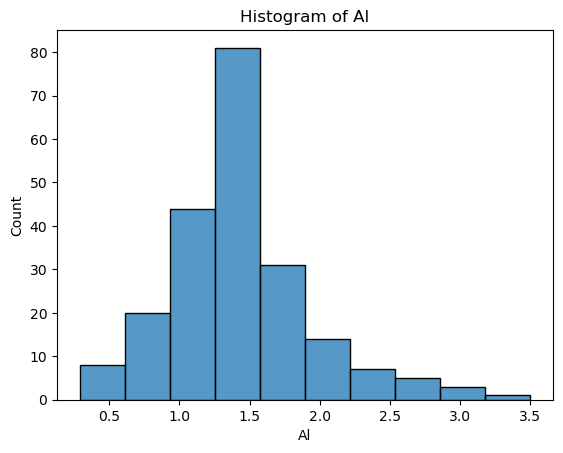

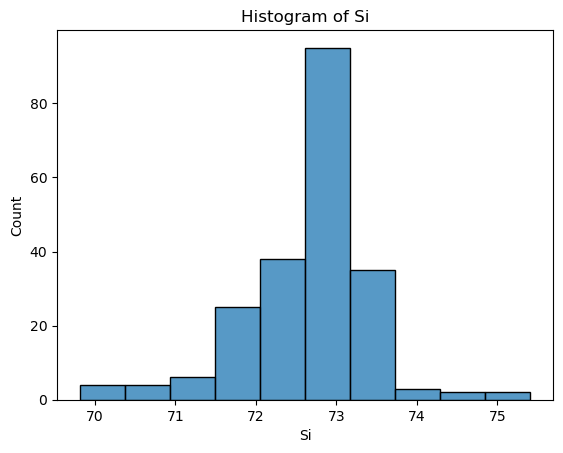

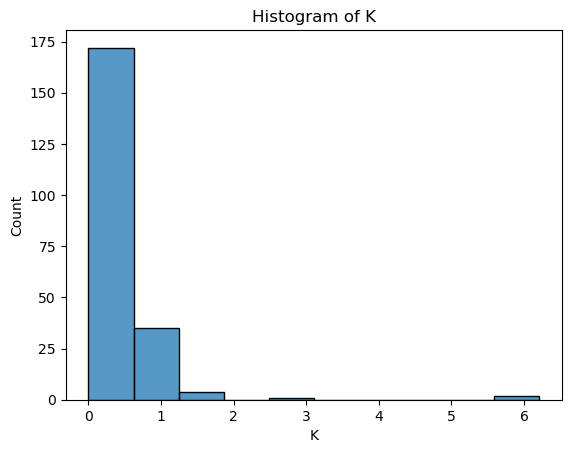

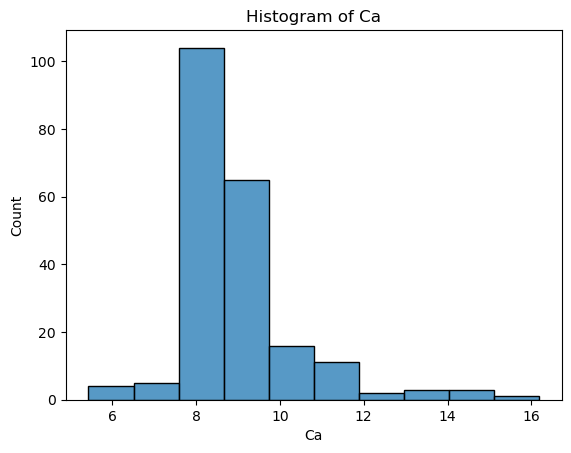

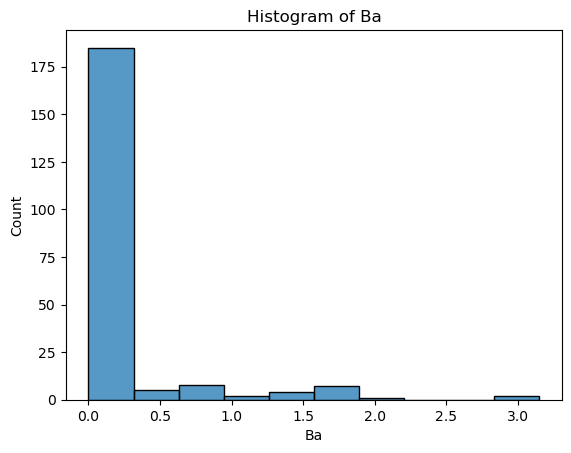

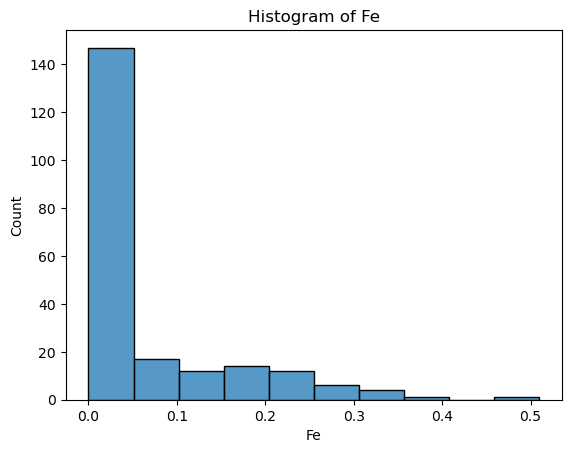

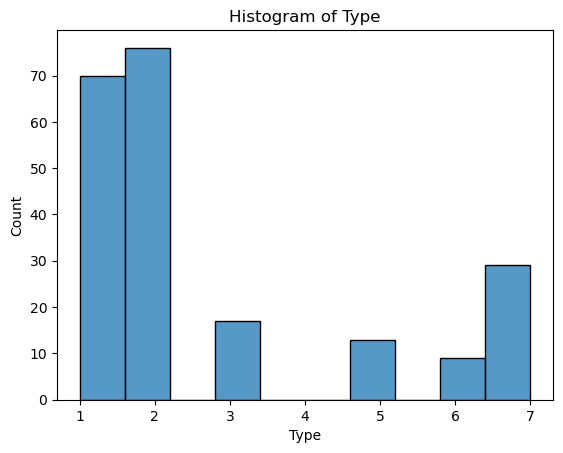

In [9]:
# Plotting histogram for all columns 
for i, column in enumerate(data.columns):
    sns.histplot(data[column],bins=10)
    plt.title(f'Histogram of {column}')
    plt.show()

### Boxplot

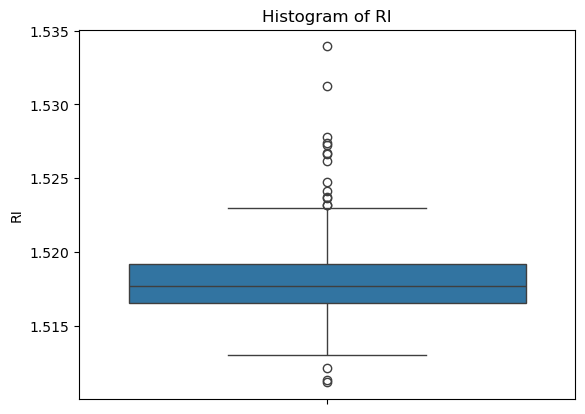

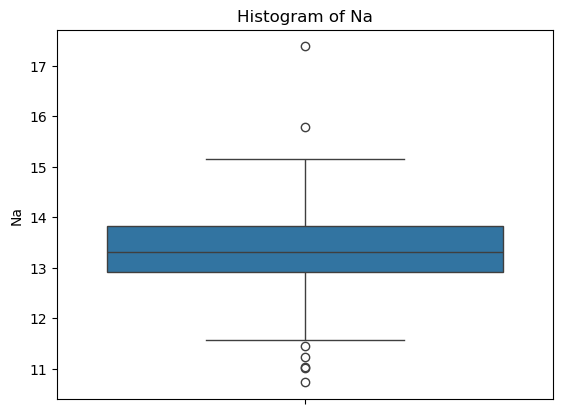

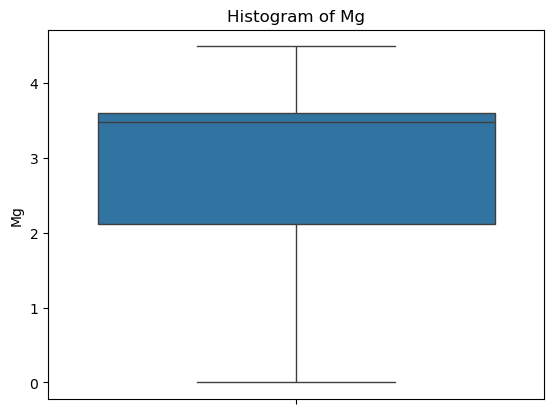

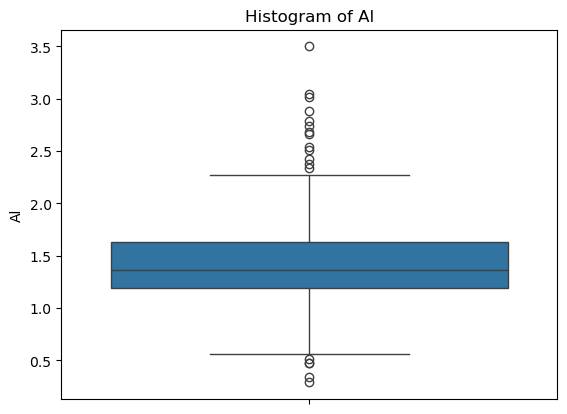

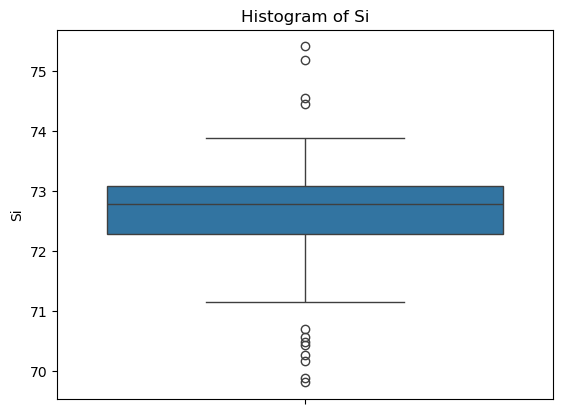

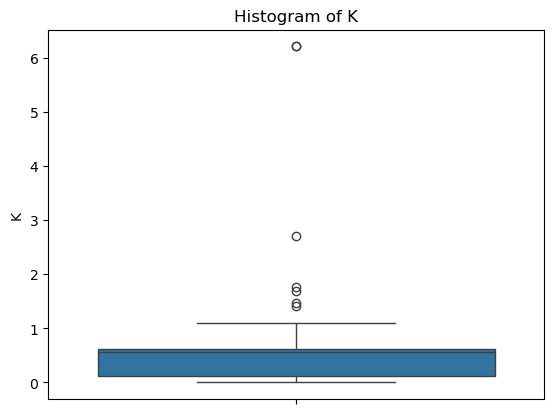

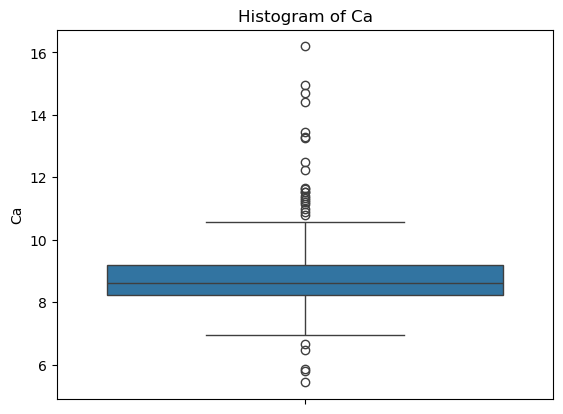

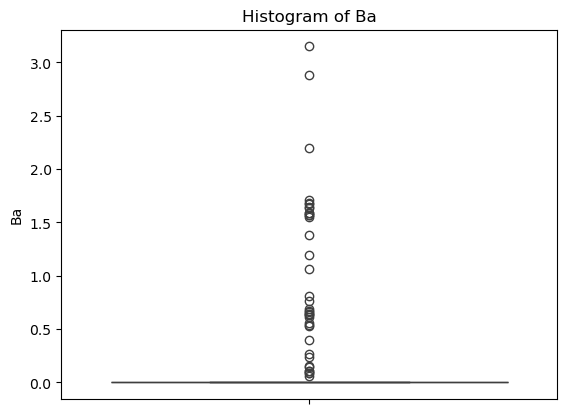

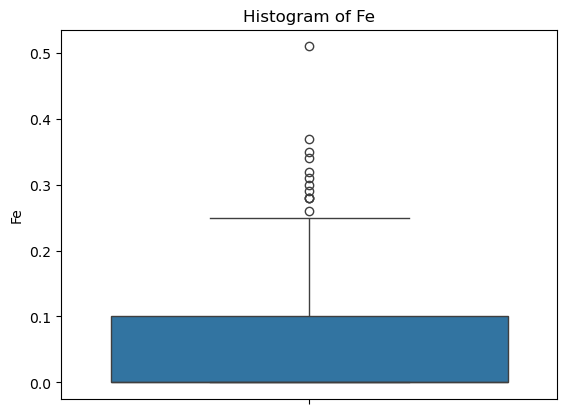

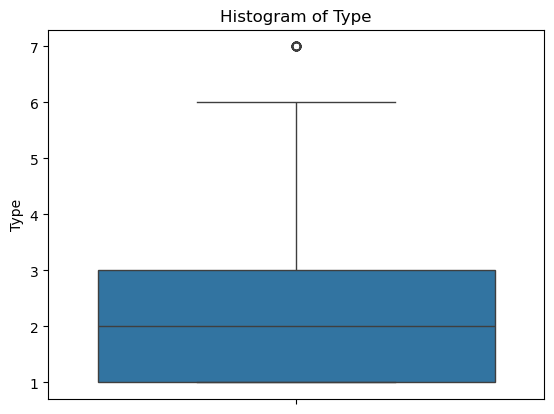

In [10]:
# PLotting boxplot for all numerical columns
for i, column in enumerate(data.columns):
    sns.boxplot(data[column])
    plt.title(f'Histogram of {column}')
    plt.show()

### Countplot

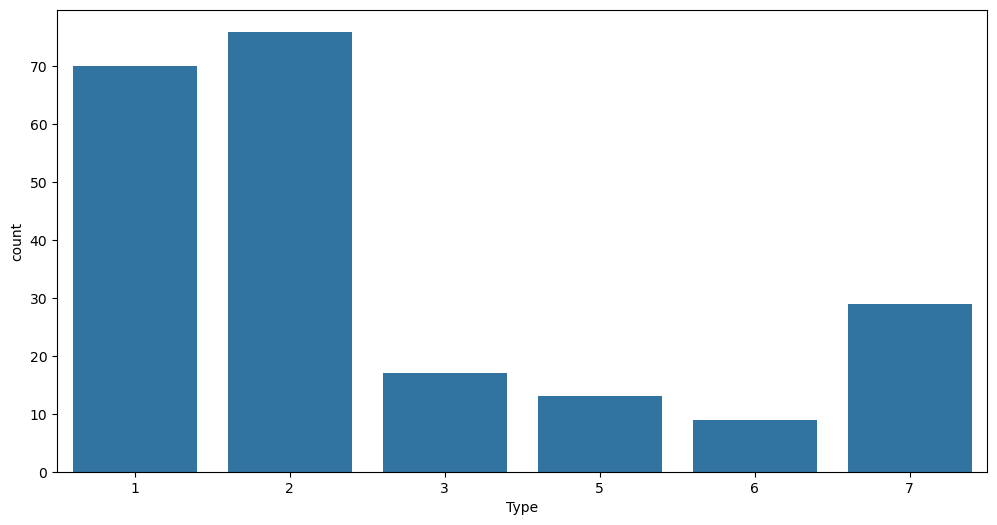

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x=data['Type'])
plt.show()

In [12]:
data.corr()    #Correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### Heatmap

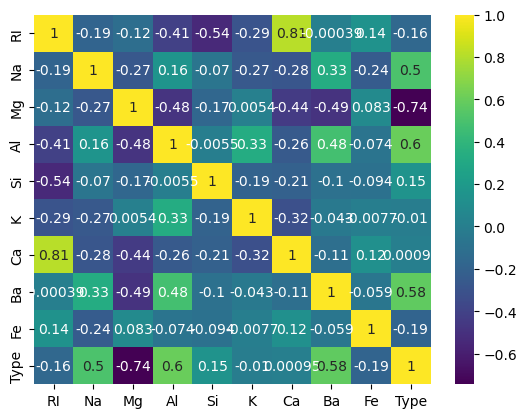

In [13]:
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap="viridis")
plt.show()

# Random Forest Model Implementation

In [14]:
# split the data
X = data.iloc[:,0:8]
y = data['Type']

In [15]:
scal = StandardScaler()
x_scal = scal.fit_transform(X)

# convert the scaled data back into a dataframe
xscal_df = pd.DataFrame(x_scal, columns=X.columns)

In [16]:
# split the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(xscal_df,y,test_size=0.20,random_state=41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((171, 8), (43, 8), (171,), (43,))

In [17]:
rnd_model = RandomForestClassifier(n_estimators=50,max_depth=8)   # initialize the model
rnd_model.fit(X_train,y_train)                                    # fit the model
yrfc_train = rnd_model.predict(X_train)                           

In [18]:
yrfc_train

array([2, 3, 1, 1, 7, 2, 1, 5, 1, 2, 7, 1, 2, 7, 1, 2, 5, 2, 2, 1, 1, 1,
       2, 7, 2, 1, 7, 7, 2, 1, 7, 2, 1, 5, 1, 2, 1, 2, 7, 7, 7, 3, 2, 2,
       1, 3, 5, 7, 6, 1, 1, 1, 2, 7, 3, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 6, 2, 2, 3, 1, 2, 2, 2, 2, 1, 1, 5, 2, 5, 2, 3, 5, 2, 1,
       6, 1, 1, 5, 2, 2, 7, 1, 2, 2, 2, 2, 2, 1, 1, 2, 7, 7, 3, 2, 1, 3,
       2, 7, 2, 1, 2, 2, 1, 1, 3, 7, 2, 1, 1, 1, 2, 2, 6, 6, 2, 2, 6, 2,
       7, 2, 2, 7, 6, 7, 2, 6, 2, 1, 3, 2, 1, 2, 2, 5, 7], dtype=int64)

In [19]:
cm = confusion_matrix(y_train,yrfc_train)  # on training data
cm

array([[54,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0],
       [ 2,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 1,  0,  0,  0,  0, 23]], dtype=int64)

In [20]:
print(classification_report(y_train,yrfc_train))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        54
           2       1.00      1.00      1.00        62
           3       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      0.96      0.98        24

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [21]:
# on testing data
yrfc_test = rnd_model.predict(X_test)
con_mat = confusion_matrix(y_test,yrfc_test)
con_mat

array([[15,  0,  1,  0,  0,  0],
       [ 2, 12,  0,  0,  0,  0],
       [ 2,  1,  2,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  4]], dtype=int64)

In [22]:
# Classification Report
print(classification_report(y_test,yrfc_test))

              precision    recall  f1-score   support

           1       0.79      0.94      0.86        16
           2       0.75      0.86      0.80        14
           3       0.67      0.40      0.50         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.79        43
   macro avg       0.70      0.67      0.67        43
weighted avg       0.75      0.79      0.76        43



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Adaboost

In [23]:
adb_model = AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
adb_model.fit(X_train,y_train)
yrfc_train = adb_model.predict(X_train)

In [24]:
yrfc_train

array([1, 1, 2, 1, 7, 2, 1, 5, 1, 2, 7, 1, 2, 7, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 7, 1, 1, 7, 2, 2, 2, 7, 2, 1, 2, 2, 2, 1, 2, 7, 7, 7, 2, 2, 2,
       1, 1, 2, 7, 6, 1, 1, 2, 2, 7, 2, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 7, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 6, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 5, 1, 2, 2, 1, 2, 2, 1,
       6, 1, 1, 2, 2, 1, 7, 1, 2, 2, 1, 2, 2, 1, 1, 2, 7, 7, 2, 2, 2, 1,
       1, 7, 1, 1, 2, 2, 1, 1, 1, 7, 1, 2, 2, 2, 2, 1, 6, 6, 2, 2, 6, 5,
       7, 2, 2, 7, 6, 7, 2, 6, 6, 1, 2, 2, 1, 2, 2, 5, 7], dtype=int64)

In [25]:
cm = confusion_matrix(y_train,yrfc_train) # on training 
cm

array([[44, 10,  0,  0,  0,  0],
       [13, 47,  0,  1,  1,  0],
       [ 8,  4,  0,  0,  0,  0],
       [ 0,  8,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 1,  1,  0,  0,  0, 22]], dtype=int64)

In [26]:
# Classification report
print(classification_report(y_train,yrfc_train))

              precision    recall  f1-score   support

           1       0.67      0.81      0.73        54
           2       0.67      0.76      0.71        62
           3       0.00      0.00      0.00        12
           5       0.75      0.27      0.40        11
           6       0.89      1.00      0.94         8
           7       1.00      0.92      0.96        24

    accuracy                           0.73       171
   macro avg       0.66      0.63      0.62       171
weighted avg       0.68      0.73      0.69       171



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
yrfc_test = adb_model.predict(X_test)          # on testing dataset
con_mat = confusion_matrix(y_test,yrfc_test)
con_mat

array([[14,  2,  0,  0,  0,  0],
       [ 5,  8,  0,  1,  0,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  3]], dtype=int64)

In [28]:
print(classification_report(y_test,yrfc_test))

              precision    recall  f1-score   support

           1       0.61      0.88      0.72        16
           2       0.57      0.57      0.57        14
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.60      0.75         5

    accuracy                           0.60        43
   macro avg       0.53      0.51      0.51        43
weighted avg       0.55      0.60      0.56        43



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Additional Notes

### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating):

Bagging involves training multiple models independently using different random subsets of the training data (with replacement).
The final prediction is made by averaging the predictions of all models (for regression) or taking a majority vote (for classification).
It reduces variance and helps to avoid overfitting.
Example: Random Forest is a bagging method using decision trees as base learners.

Boosting:

Boosting trains multiple models sequentially, where each model tries to correct the errors of the previous one.
The models are trained on the entire dataset, but with adjusted weights for misclassified instances to focus more on difficult cases.
The final prediction is a weighted combination of all models.
It reduces bias and can lead to better performance but is more prone to overfitting.
Example: AdaBoost, Gradient Boosting.
    

### 2. Explain how to handle imbalance in the data.

Resampling Techniques:
Oversampling: Increase the number of instances in the minority class by duplicating samples or creating synthetic samples (e.g., SMOTE).
Undersampling: Decrease the number of instances in the majority class by randomly removing samples.
Algorithm-Level Methods:
Class Weights: Modify the algorithm to pay more attention to the minority class by assigning higher weights.
Hybrid Methods:
Combine oversampling and undersampling to balance the dataset.